# Кратчайшие пути

Существуют вариации в зависимости от конкретного случая, но обычно базовой задачей о кратчайших путях считают следующую: дана вершина $s$, найти пути миниальной длины (длина пути -- сумма длин образующих его ребер) до всех остальных вершин. В случае, если длины всех ребер одинаковы, то эта задача решается с помощью базового обхода в ширину, в общем случае его недостаточно, одна есть похожий по простоте метод, на котором основано подавляющее большинство методов нахождения кратчайших путей.

### Обозначения
\begin{align}
u\rightarrow v~-~& ребро~из~u~в~v \\
u\rightsquigarrow v~-~& путь~из~u~в~v \\
u\rightsquigarrow z\rightsquigarrow v~-~& путь~из~u~в~v,~проходящий~через~z \\
u\rightsquigarrow z\rightarrow v~-~& путь~из~u~в~v,~в~котором~последнее~ребро~начинается~в~z \\
u\rightarrow z\rightsquigarrow v~-~& путь~из~u~в~v,~в~котором~первое~ребро~ведет~в~z \\
u_i\rightsquigarrow_{i=1}^{n-1} u_{i+1}=u_1\rightarrow\ldots\rightarrow u_n ~-~& путь,~состоящий~из~ребер~u_1\rightarrow u_2,~u_2\rightarrow u_3,\ldots,~u_{n-1}\rightarrow~u_n. \\
\omega(u\rightarrow v)~-~ & длина~ребра~u\rightarrow v. \\
\omega(u_i\rightsquigarrow_{i=1}^{n-1} u_{i+1})=\sum_{i=1}^{n-1}\omega(u_i\rightarrow u_{i+1})~-~& длина~пути, состоящего~из~ребер~u_1\rightarrow u_2,~u_2\rightarrow u_3,\ldots,~u_{n-1}\rightarrow~u_n. \\
d(u, v)~-~& минимальная~длина~пути~из~u~в~v.
\end{align}
Так как путей из одной вершины в другую может быть много, то обозначение $u\rightsquigarrow v$ предполагает какой-то путь. Если нужно будет уточнить промежуточные вершины в этом пути, то будут использованы правила конкатенации, указанные выше. Длина пути определяется как сумма длин ребер и, соответственно, используется только для путей с явным указанием последовательности ребер.

## Дерево кратчайших путей и динамическое программирование
У кратчайших путей есть одно чрезвычайно важное свойство: если $u_1\rightarrow\ldots\rightarrow u_n$ -- кратчайший путь из $u_1$ в $u_n$, то для всех $1\leq i<j\leq n$: $u_i\rightarrow\ldots\rightarrow u_j$ -- кратчайший путь из $u_i$ в $u_j$, иначе говоря любой кусок оптимального пути также является оптимальным, это свойство обычно называют оптимальной подструктурой. Для решений задач с подобным свойством оказался очень успешным метод динамического программирования, который в целом можно описать следующими принципами:
* Вместе с $d(u, v)$ вычисляем еще какие-то вспомагательные величины, также обозначающие кратчайшие пути, но обычно дополнительно чем-то ограниченые.
* Последовательно вычислять вспомагательные величины начиная с коротких путей постепенно переходя к более длинным.

Подробней уже в конкретных алгоритмах. 

Теперь предположим, что мы каким-то образом научились вычислять $d$ для одной пары вершин или нескольких, обычно нам не только интересно само расстояние, но и сам путь. Возникает следующая проблема: $d(u, v)$ -- это одно число, а вот путь -- это уже последовательность. Вопрос в том, можно компактно представить себе этот набор оптимальных путей? В случае, если нас интересуют оптимальные пути от одной вершины до всех остальных, то это удается сделать довольно изящно, очень сильно помагает оптимальная подструктура: если
$$
d(u_1, u_n)=\omega(u_1\rightarrow\ldots\rightarrow u_n),
$$
то
\begin{align}
d(u_1, u_n)=\omega(u_1\rightarrow\ldots\rightarrow u_n)=\omega(u_1\rightarrow\ldots\rightarrow u_{n-1})+\omega(u_{n-1}\rightarrow u_n)=d(u_1, u_{n-1})+\omega(u_{n-1}\rightarrow u_n)
\end{align}
По сути мы просто выделили последнее ребро на оптимальном пути. Предположим, что мы как-то умеем выделять оптимальный путь $u_1\rightsquigarrow u_{n-1}$, тогда чтобы выделить оптимальный путь $u_1\rightsquigarrow u_{n}$, то достаточно запомнить последнее ребро на этом оптимальном пути $u_{n-1}\rightarrow u_n$ и дописать его в конец оптимального пути $u_1\rightsquigarrow u_{n-1}$. Пример этой концепции покажу чуть позже

## Сканирующий метод

Базовый метод для нахождения кратчайших путей заключается в следующем:
\begin{align}
&scan\_arc(v\rightarrow u): \\
&~ ~ ~ ~if (l(v) + \omega(v\rightarrow u) < l(u)) \\
&~ ~ ~ ~ ~ ~ ~ ~l(u)\leftarrow l(v)+\omega(v\rightarrow u) \\
&~ ~ ~ ~ ~ ~ ~ ~p(u)\leftarrow v \\
&~ ~ ~ ~ ~ ~ ~ ~mark(u)\leftarrow labelled \\
& \\
&scan\_vertex(v): \\
&~ ~ ~ ~for~u~such~that~v\rightarrow u~exists: \\
&~ ~ ~ ~~ ~ ~ ~scan\_arc(v\rightarrow u) \\
&~ ~ ~ ~mark(v)\leftarrow scanned \\
& \\
& l(s)\leftarrow 0,~mark(s)\leftarrow labelled \\
& while~exists~v~with~mark(v)=labelled:\\
&~ ~ ~ ~scan\_vertex(v)
\end{align}

Здесь $l(v)$ -- это некоторое расстояние до вершины $v$, которое изменяется по ходу работы алгоритма какждый раз немного улучшаясь, $p(v)$ обновляется вместе с $l$ и запоминает предыдущую вершиу на пути, который мы сейчас считаем минимальным, $mark(v)$ -- пометка вершины: labelled означает, что с момента последнего сканирования этой вершины расстояние до нее изменилось (т.е. уменьшилось), а значит нужно её отсканировать заново; scanned означает, что мы отсканировали вершину, попытались с помощью неё уменьшить расстояния до её соседей, и при этом после этого расстояние до этой вершины не изменялось. 

Большинство известных методов нахождения кратчайших путей являются частыми случаями сканирующего метода и отличаются только тем, как выбирать вершины для сканирования в цикле.

### Анализ сканирующего метода
Основные два утверждения касательно сканирующего метода заключается в том, что
* Вне зависимости от выбора вершина для сканирования алгоритм завершается тогда и только тогда, когда в графе нет отрицательных циклов. Это также является необходимым и достаточным условием корректности задачи о кратчайших путях.
* По завершению алгоритма для всех $v$ выполняется 
$$
l(v)=d(s, v)
$$
* По завершению $p(v)$ содежит последнее ребро на кратчайшем пути из $s$ в $v$, соответственно ребра $p(v)\rightarrow v$ образуют дерево кратчайших путей. 


Первый факт обосновывается следующим образом: если нет отрицательных циклов, значит минимальный путь существует и является простым (без повторений вершин); промежуточные пути в алгоритме являются простыми, вершина помечается $labelled$ только если путь до неё уменьшился, а значит количество раз, когда мы вызовем сканирование вершины конечно.

Обоснования второго факта: для начала заметим, что сканирующий метод обязательно просмотрит все достижимые вершины, так как если запретить повторно сканировать вершину, то сканирущий метод вырождается в BFS. Для недостижимых вершин $l(v)=d(s, v)=+\infty$. Далее заметим, что так как $l(v)$ соответствует длине какого-то пути $s\rightsquigarrow v$, то по определению $d$
$$
l(v)\geq d(s, v).
$$
Пусть оптимальный путь $s\rightsquigarrow$ состоит из вершин $s=u_1, \ldots, u_k=v$, каждая из этих вершин была просканирована хотя бы раз, а значит по завершению работы алгорима выполняется 
$$
l(u_i)-l(u_{i-1})\leq \omega(u_{i-1}\rightarrow u_i)
$$
(так как $l(u_i)$ может только уменьшаться и при этом после последнего сканирования $u_{i-1}$ это неравенство выполнялось). Просуммировав эти неравенства получаем
$$
l(v)=l(v)-l(s)\leq \sum_{i=1}^{n}\omega(u_{i-1}\rightarrow u_i)=d(s, v).
$$
Третее утверждение вытекает из второго и того факта, что $p(v)$ всегда обновляется вместе с $l(v)$.

In [1]:
import random
import graphviz
from graph_utils.graph import Graph, Arc, Node
from animation_utils.animation import animate_list

In [2]:
def mark_labelled(node):
    node.SetColor('red')
    
def mark_scanned(node):
    node.SetColor('green')
    
def process_node(node):
    node.SetColor('blue')
    
def set_previous(arc):
    arc.SetColor('green')
    
def unset_previous(arc):
    arc.SetColor('black')

def scan_arc(graph, arc, l, p, mark):
    if l[arc.end] > l[arc.beginning] + arc.weight:
        l[arc.end] = l[arc.beginning] + arc.weight
        if p[arc.end] is not None:
            unset_previous(p[arc.end])
        # Сохраняем arc, а не arc.beginning, чтобы было больше информации
        p[arc.end] = arc
        set_previous(p[arc.end])
        mark[arc.end] = True
        mark_labelled(graph.nodes[arc.end])

def scan_node(graph, node_id, l, p, mark):
    for arc in graph.nodes[node_id].arcs:
        scan_arc(graph, arc, l, p, mark)
    mark[node_id] = False
    mark_scanned(graph.nodes[node_id])
    
def random_choice(l, mark):
    labelled = [node_id for node_id, value in mark.items() if value == True]
    if len(labelled) == 0:
        return None
    return random.choice(labelled)
       
def base_scanning_method(graph, s, choice_function):
    l    = {key: float('Inf') for key in graph.nodes.keys()}
    p    = {key: None for key in graph.nodes.keys()}
    mark = {key: False for key in graph.nodes.keys()}
    
    l[s] = 0
    mark[s] = True
    mark_labelled(graph.nodes[s])
    
    out_lst = []
    
    while True:
        node_id = choice_function(l, mark)
        if node_id is None:
            break
        process_node(graph.nodes[node_id])
        out_lst.append(graph.Visualize(l))
        scan_node(graph, node_id, l, p, mark)
        out_lst.append(graph.Visualize(l))
    return l, p, out_lst

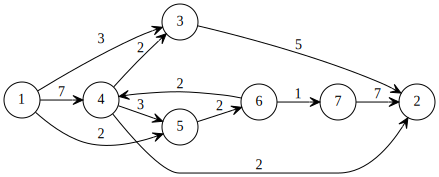

In [3]:
arcs = [
    Arc(1, 3, 3),
    Arc(1, 4, 7),
    Arc(4, 3, 2),
    Arc(4, 5, 3),
    Arc(1, 5, 2),
    Arc(6, 4, 2),
    Arc(5, 6, 2),
    Arc(6, 7, 1),
    Arc(7, 2, 7),
    Arc(4, 2, 2),
    Arc(3, 2, 5)
]
Graph(arcs).Visualize()

In [4]:
graph = Graph(arcs)
random_scanning_shortest_path_lst = []
l, p, random_scanning_shortest_path_lst = \
    base_scanning_method(graph, 1, random_choice)

In [5]:
animate_list(random_scanning_shortest_path_lst);

interactive(children=(IntSlider(value=0, description='idx', max=15), Output()), _dom_classes=('widget-interact…

### Кратчайшие пути на ациклических графах
В случае, если в графе нет не только отрицательных циклов, но вообще любых других, то возникает интересная ситуация: если обрабатывать вершины в топологическом порядке, то каждая вершина будет просканирована ровно один раз. Доказать это очень просто: если в графе допустим топологический порядок, то при сканировании вершины $v$ расстояние обновится только для тех вершин, которые в топологическом порядке идут позже $v$.

Если вершины в графе пронумерованы в топологическом порядке, то в указанной выше процедуре для этого достаточно будет просто вместо случайной вершины выбирать наименьшую по номеру

In [6]:
def least_id_choice(l, mark):
    labelled = [node_id for node_id, value in mark.items() if value == True]
    if len(labelled) == 0:
        return None
    return min(labelled)

In [7]:
graph = Graph([
    Arc(0, 1, 4),
    Arc(0, 2, 2),
    Arc(1, 2, 5),
    Arc(2, 3, 3),
    Arc(1, 4, 10),
    Arc(3, 4, 4),
    Arc(4, 5, 11)
])
l, p, topological_scanning_shortest_path_lst = \
    base_scanning_method(graph, 0, least_id_choice)
animate_list(topological_scanning_shortest_path_lst);

interactive(children=(IntSlider(value=0, description='idx', max=11), Output()), _dom_classes=('widget-interact…

Это один из двух случаев, когда достигается асимптотическая оценка в $\mathcal{O}(E)$ ($E$ -- количество ребер): во-первых, топологическая сортировка осуществляется обходом в глубину за $\mathcal{O}(E)$; во-вторых каждая вершины сканируется ровно один раз, а значит какждое ребро также сканируется ровно один раз; в-третьих если вместо выбора минимальной вершины просто итерироваться в по всем вершинам в топологическом порядке пропуская недостижимые, то результат будет тот же, и при этом суммарно на это мы тратим $\mathcal{O}(V)$ ($V$ -- количество вершин). 

На практике ациклические графы часто возникают при моделировании каких-либо протекающих во времени событий. Например одним из промежуточных результатов распознавания речи называе "словные сетки" -- это граф, в котором вершины помечены временнОй меткой, а на ребрах написано слово и информация об акустическом/языковом правдоподобие; ребра всегда ведут из вершин с меньшей временной отметков в вершину с большей и означают, что на этом интервале с такой-то вероятностью было произнесено такое-то слово. Пути в этом графе соответствуют временному интервалу, начинающемуся от временной отметки первой вершины, заканчивающемуся во временной отметке последней вершины. Forward-backward алгоритмы по сути являются частными случаями нахождения кратчайших путей в ациклическом графа, в том числе и алгоритм Витерби для нахождения наиболее правдоподобной последовательности состояний в марковской цепи.

### Обход в ширину и алгоритм Дейкстры
Второй случай, в котором оказывается возможной минимальная оценка для поиска кратчайших путей -- это случай единичных весов, т.е. когда длины всех ребер одинаковы. С точки зрения сканирующего метода в этом случае можно добиться того, чтобы каждая вершина сканировалась ровно один раз, все, что для этого нужно сделать, а это выбирать для очередного сканирования вершину с минимальным расстоянием.

In [8]:
def least_distance_choice(l, mark):
    labelled = [node_id for node_id, value in mark.items() if value == True]
    if len(labelled) == 0:
        return None
    return min(labelled, key=lambda x: l[x]) 

In [9]:
graph = Graph([
    Arc(1, 3, 1),
    Arc(1, 4, 1),
    Arc(4, 3, 1),
    Arc(4, 5, 1),
    Arc(1, 5, 1),
    Arc(6, 4, 1),
    Arc(5, 6, 1),
    Arc(6, 7, 1),
    Arc(7, 2, 1),
    Arc(4, 2, 1),
    Arc(3, 2, 1)
])
l, p, bfs_shortest_path_lst = \
    base_scanning_method(graph, 1, least_distance_choice)
animate_list(bfs_shortest_path_lst);

interactive(children=(IntSlider(value=0, description='idx', max=13), Output()), _dom_classes=('widget-interact…

На самом деле для того, чтобы при выборе вершины с минимальным расстоянием каждая вершина сканировалась единожды, достаточно более слабого условия -- чтобы в графе не было ребер с отрицательным весом. Ключевое соображение: кратчайший путь до вершины $v$ может проходить по тем вершинам, которые ближе к $s$, чем $v$. Из этого утверждения следует другое, чуть менее очевидное: если мы уже каким-то образом нашли первые $k$ ближайших вершин и посчитали минимальные пути, проходящие только через них, то расстояние до ближайшей из оставшихся вершин посчитано корректно. Если посмотреть на величины значения $l(v)$, которые мы получаем после $k$-ого сканирования (обозначим её за $l(v, k)$), то получится величина минимального пути от $s$ до $v$, имеющая в качестве промежуточных вершин только $k$ ближайших к $s$. Если обозначить за $u(k)$ -- $k$-ую ближайшую вершину к $s$, то мы получаем следующее соотношение
$$
l(v, k)=\min\{l(v, k-1), l(u(k), k-1)+\omega(u(k)\rightarrow v)\}
$$
Левая величина в минимуме -- это минимум среди путей, которые используют $u(k)$, правая -- минимум среди путей, которые не используют $u(k)$.

In [10]:
graph = Graph(arcs)
l, p, dijkstra_shortest_path_lst = \
    base_scanning_method(graph, 1, least_distance_choice)
animate_list(dijkstra_shortest_path_lst);

interactive(children=(IntSlider(value=0, description='idx', max=13), Output()), _dom_classes=('widget-interact…

В общем виде этот метод впервые этого методы обосновал Эдсгер Дейкстра. Ключевым вопросом в этом алгоритме является нахождение минимальной вершины для сканирования. В случае, если все длины одинаковы, то это можно сделать обычной очередью: сохраняем в очереди все вершины с пометкой $labelled$, при сканировании ребра помещаем вершину в конец очереди если расстояние уменьшилось, при выборе новой вершины берем первую из очереди. В общем то в этом случае алгоритм вырождается в обход в глубину.

В общем случае для работы с вершинами, помеченными $labelled$ необходима специальная структура данных, позволяющая быстро делать следующие операции:
* Добавить вершину в множество
* Обновить расстояние для вершины из множества
* Найти миимальную по расстоянию вершину из множества
* Удалить вершину из множества

Одним из простых способов реализовать все эти операции -- использовании бинарной кучи или бинарного дерева, все операции выполняются за $\mathcal{O}(\log N)$, где $N$ -- размер множества, что ведет к общей сложности алгоритма в $\mathcal{O}(E\log V)$.

Наиболее асимптотически оптимальный известный алгоритм использует [кучу фибоначчи](https://en.wikipedia.org/wiki/Fibonacci_heap), которая умеет делать первые три операции за $\mathcal{O}(1)$ и последнюю за $\mathcal{O}(\log N)$, что ведет к общей сложности $\mathcal{O}(E+V\log V)$

К сожалению все описанные рассуждения ломаются, если в графе возникают ребра отрицательной длины, например единственность сканирования пропадает например на следующем примере

In [11]:
graph = Graph([
    Arc(1, 2, 2),
    Arc(1, 3, 3),
    Arc(3, 2, -2),
    Arc(2, 4, 1),
])
l, p, dijkstra_shortest_path_lst = \
    base_scanning_method(graph, 1, least_distance_choice)
animate_list(dijkstra_shortest_path_lst);

interactive(children=(IntSlider(value=0, description='idx', max=9), Output()), _dom_classes=('widget-interact'…

### Алгоритм Форда-Беллмана

Частично этот алгоритм похож на перидыдущий тем, что по сути является просто применением обычной очереди для общего случая. Обычно алгоритм Форда-Беллмана имеет следующий вид

In [12]:
def ford_bellman(graph, s):
    l    = {key: float('Inf') for key in graph.nodes.keys()}
    p    = {key: None for key in graph.nodes.keys()}
    mark = {key: False for key in graph.nodes.keys()}
    
    l[s] = 0
    mark[s] = True
    mark_labelled(graph.nodes[s])
    
    out_lst = [graph.Visualize(l)]
    
    for k in range(len(graph.nodes)-1):
        for node in graph.nodes.values():
            scan_node(node)
        out_lst.append(graph.Visualize(l))
    return l, p, out_lst 

Здесь я специально сделал так, что внешний цикл итерируется фиксированное число раз -- $V-1$, при этом переменная $i$ не используется. Внутренний цикл сканирует каждую вершину по одному разу, это эквивалентно тому, чтобы просканировать по одному разу каждое ребро. Оказывается, что такого количества проходов всегда достаточно, даже если в графе есть отрицательные ребра. Идея следующая: давайте рассмотрим величину $l(v, k)$ -- минимальная длина пути от $s$ до $v$, состоящего из не более, чем $k$ ребер, тогда для неё справедливо следующее соотношение
$$
l(v, k)=\min \{l(v, k-1), \min_u[l(u, k-1)+\omega(u\rightarrow v)]\}.
$$
Иначе говоря, либо оптимальный путь использует меньше, чем $k$ ребер, либо из него можно выделить последнее ребро, а оставшаяся часть использует $k-1$ ребро.

Один проход по всем ребрам гарантирует нам переход от $l(v, k-1)$ к $l(v, k)$, однако из-за того, что мы не считаем непосредственно эти величины, а храним их в одном массиве $l$, то получается что на итерации $k$ у нас обычно чуть лучше, чем $l(v, k)$, охватывают пути не только длины $k$, но гарантировать мы может охват только таких путей. Наконец, после $V-1$ итераций мы обязательно охватим все простые пути. Если же оказалось, что после $V-1$ итерации сканирование ребер продолжит уменьшать вес, то в графе есть отрицательный цикл. Этот факт позволяет использовать Алгоритм Форда-Беллмана для нахождения отрицательных циклов.

Возвращаясь к сканирующему методу: мы можем спокойно пропускать в цикле вершины, которые помечены $scanned$. С точки зрения вызовов $scan\_node$ это будет эквивалентно тому, чтобы использовать в сканирующем методе обычную очередь, но при этом использование очереди эффективнее.

# Примеры из МО
### Алгоритм Витерби
Одна из основных задач для марковских цепей заключается в том, чтобы найти последовательность состояний в марковской цепи наиболее правдоподобно соответствующую некоторой последовательности наблюдений
$$
H(O)=argmax_{v=\{v_0, \ldots, v_n\}}\prod_{i=1}^nP(v_{i-1}\rightarrow v_i~|~O_i)
$$
Например в распознавании речи $P(u\rightarrow v~|~O)$ -- это акустическая модель, классифицирующая кусок звука по нескольким языковым единицам, например фонемам. Из наиболее правдоподобной последовательности состояний можно извлечь последовательность фонем и в конце концов последовательность слов.

Если немного переписать величину выше, можно получить в точности задачу о кратчайшем пути
$$
argmax_{v=\{v_0, \ldots, v_n\}}\prod_{i=1}^nP(v_{i-1}\rightarrow v_i~|~O_i)=argmax_{v=\{v_0, \ldots, v_n\}}\sum_{i=1}^n\mathcal \log{P}(v_{i-1}\rightarrow v_i~|~O_i)=argmin_{v=\{v_0, \ldots, v_n\}}\sum_{i=1}^n(-\log P(v_{i-1}\rightarrow v_i~|~O_i))
$$
Стоит отметить, если $P$ -- вероятность, то что $-\log P\geq 0$, что, как мы уже обсудили, имеет значение для кратчайших путей, но не в этом случае.

Пока что мы перешли от умножения к сложению, и от максимума к минимуму, но мы пока еще не получили задачу о кратчайшем пути: пока что у нас задача нахождения минимального пути, содержащую фиксированное число переходов, котором веса ребер зависят от времени. Эта задачу можно свести к обычной задаче о кратчачйшем пути на так расгиренном графе как на следующих примерах.

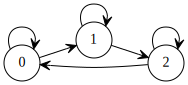

In [13]:
graph = Graph([
    Arc(0, 1),
    Arc(1, 2), 
    Arc(2, 0),
    Arc(1, 1),
    Arc(2, 2),
    Arc(0, 0)
])
graph.Visualize()

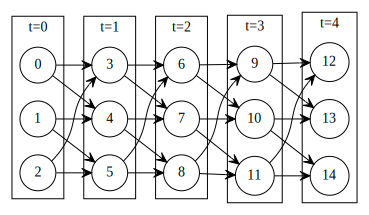

In [14]:
expanded_graph = graph.expand_in_time(4)
expanded_graph.Visualize()

## Отслеживание объекта на плоскости
Предположим, что у нас есть набор из $m$ сенсоров, расположенныз в точках $x_1, \ldots, x_m$ соответственно, которые умеют измерять расстояния до объекта (не важно, каким образом) и выдавать его в качестве функции правдоподобия (если сенсор выдает одно число, то можно считать, что он выдает индикатор-функцию для этого числа). Допустим мы снимаем показание на равных промежутках времени, на замере $t$ мы получаем функции правдоподобия $g_i(t, \|x-x_i\|)$. Оценка максимального правдоподобия положения объекта в пространстве c учетом сделанных замеров выглядит как-то так
\begin{align*}
x&=argmax_{y}\sum_{i=1}^m\log P(y~|~g_i) \\
&=argmax_{y}\sum_{i=1}^m\log [P(g_i~|~y)P(y)] \\
&=argmax_{y}\sum_{i=1}^m\sum_{t=0}^T\log [g_i(t, \|y(t)-x_i\|)P(y)]
\end{align*}
Если не накладывать никакие априорные ограничения ограничения на $x$, то вероятность $P(y)$ можно убрать и получить, что 
$$
x(t)=argmax_{z}\sum_{i=1}^T \log g_i(t, \|z-x_i\|),
$$
т.е. оценка координат происходит раздельно раздельно. Такой подход например может привести к тому, что оценка будет сильно болтаться, в то время, как мы ожидаем, что между двумя последовательными оценками разница должна быть небольшой.

In [15]:
import numpy as np
import scipy, scipy.stats, scipy.optimize
from scipy.stats import chi2

class Sensor:
    def __init__(self, x, y, r=10, scale=4):
        self.position = np.array([x, y])
        self.max_distortion_range = r
        self.distortion_scale = scale
        
    def loglikelihood(self, x, y, x_real, y_real):
        k = int(np.linalg.norm(self.position- np.array([x_real, y_real])))
        p = random.randint(1, self.max_distortion_range)
        return chi2.logpdf(np.linalg.norm(self.position - np.array([x, y])), k) + self.distortion_scale * chi2.logpdf(np.linalg.norm(self.position - np.array([x, y])), p)

Здесь сенсоры моделируются с помощью $\chi$-квадрат распределения. Используется тот факт, что максимум 

In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [11,11]

In [18]:
path = [np.array([5, 5])]
for i in range(30):
    dx = 2 * np.random.rand(2) - 1
    path.append(path[-1] + dx)

def paths(path):
    figures = []
    for i in range(len(path)):
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set(xlim=(-10, 20), ylim=(-10, 20))
        ax.plot([x for x, y in path[:i+1]], [y for x, y in path[:i+1]])
        ax.scatter([x for x, y in path[i:i+1]], [y for x, y in path[i:i+1]], color='black')
        plt.close(fig)
        figures.append(fig)
    return figures
        
animate_list(paths(path));

interactive(children=(IntSlider(value=0, description='idx', max=30), Output()), _dom_classes=('widget-interact…

In [19]:
distortion_level = 0.25
distortion_radius = 20
bottom_left = -10
top_right = 20
sensors = [
    Sensor(bottom_left, bottom_left, r = distortion_radius, scale=distortion_level),
    Sensor(bottom_left, top_right,  r = distortion_radius,scale=distortion_level),
    Sensor(top_right, bottom_left, r = distortion_radius, scale=distortion_level),
    Sensor(top_right, top_right, r = distortion_radius, scale=distortion_level)    
]

def minimize_simple(f, x_min, y_min, x_max, y_max):
    best = (x_min, y_min, float('inf'))
    for i in range(10):
        for j in range(10):
            x = x_min + i * (x_max - x_min) / 10
            y = y_min + j * (y_max - y_min) / 10
            cost = f([x, y])
            if best[2] > cost:
                best = (x, y, cost)
        
    for i in range(10):
        step = 1.0 / (i + 1)
        dx, dy = step * (np.random.rand(2) * 2 - 1)
        cost = f([best[0] + dx, best[1] + dy])
        if cost < best[2]:
            best = (best[0] + dx, best[1] + dy, cost)
            
    return best[:2]
        

estimates = []
prev = [0, 0]
for x in path:
    def J(y):
        return -sum([sensor.loglikelihood(y[0], y[1], x[0], x[1]) for sensor in sensors])
    #estimates.append(scipy.optimize.minimize(J, prev, method='Nelder-Mead').x)
    estimates.append(minimize_simple(J, bottom_left, bottom_left, top_right, top_right))
    cur = estimates[-1]
    #print(J(cur), J([cur[0] - 1, cur[1]]), J([cur[0], cur[1] - 1]), J([cur[0] + 1, cur[1]]), J([cur[0], cur[1] + 1]))
    prev = estimates[-1]
    
def two_paths(path, estimates):
    figures = []
    for i in range(len(path)):
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.set(xlim=(-10, 20), ylim=(-10, 20))
        ax.plot([x for x, y in path[:i+1]], [y for x, y in path[:i+1]])
        ax.plot([x for x, y in estimates[:i+1]], [y for x, y in estimates[:i+1]])
        ax.scatter([x for x, y in path[i:i+1]], [y for x, y in path[i:i+1]], color='black')
        ax.scatter([x for x, y in estimates[i:i+1]], [y for x, y in estimates[i:i+1]], color='black')
        
        plt.close(fig)
        figures.append(fig)
    return figures
    
max_like_distances = []
for x, y in zip(path, estimates):
    max_like_distances.append(np.linalg.norm(x - y))

animate_list(two_paths(path, estimates));

D:\Programming\anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


interactive(children=(IntSlider(value=0, description='idx', max=30), Output()), _dom_classes=('widget-interact…

Из-за помех получается так себе. Тем не менее мы можем попытаться как-то ограничить эти скачки, так как в реальном мире движение происходит планомерно. простой способ сделать это -- сузbть поиск максимума правдоподобия на фиксированном расстоянии от предыдущей оценки.

In [20]:
estimates = []
prev = [0, 0]
for x in path:
    def J(y):
        return -sum([sensor.loglikelihood(y[0], y[1], x[0], x[1]) for sensor in sensors])
    #estimates.append(scipy.optimize.minimize(J, prev, method='Nelder-Mead').x)
    estimates.append(minimize_simple(J, prev[0] - 1, prev[1] - 1, prev[0] + 1, prev[1] + 1))
    cur = estimates[-1]
    prev = estimates[-1]
    
animate_list(two_paths(path, estimates));
base_distances = []
for x, y in zip(path, estimates):
    base_distances.append(np.linalg.norm(x - y))

interactive(children=(IntSlider(value=0, description='idx', max=30), Output()), _dom_classes=('widget-interact…

Уже лучше, но есть проблема, этот алгоритм все-таки жадный и учитывает только предыдущую оценку. Можно ограничить возможные точки поиска до заранее посчитанной сетки и смоделировать $P(y)$ марковской цепью на этой сетке: переходы разрешаются только на узлах, расстояние между которыми не больше некоторого порога. Таким образом мы получаем задачу поиска наиболее правдоподобной последовательности переходов в марковской цепи, где вероятноть перехода соответствует правдоподобию нахждения в узле на конце этого перехода

In [21]:
pre_grid = [[(bottom_left + i * (top_right - bottom_left) / 30, bottom_left + j * (top_right - bottom_left) / 30) for j in range(31)] for i in range(31)]
grid = []
for row in pre_grid:
    grid.extend(row)
allowed_transitions = []

for i in range(len(grid)):
    allowed_transitions.append([])
    for j in range(len(grid)):
        if np.linalg.norm(np.array(grid[i]) - np.array(grid[j])) <= 1.0:
            allowed_transitions[-1].append(j)
 

In [22]:
beam = 5.0
history_importance = 1.0
estimates = []

for i in range(len(grid)):
    if abs(grid[i][0]) < 0.5 and abs(grid[i][1]) < 0.5:
        token = (i, 0.0, None)
        break

tokens = [token]
          
for x in path:
    def J(y):
        return -sum([sensor.loglikelihood(y[0], y[1], x[0], x[1]) for sensor in sensors])
    
    new_tokens = dict()
    J_cache = dict()
    
    
    best_cost = float('inf')
    for token in tokens:
        state, cost, prev = token
        for j in allowed_transitions[state]:
            if j not in J_cache:
                new_cost = J(grid[j])
                J_cache[j] = new_cost
            else:
                new_cost = J_cache[j]
            
            if new_cost + history_importance * cost > best_cost + beam:
                continue
                
            if j not in new_tokens or new_tokens[j][1] > new_cost + cost:
                new_tokens[j] = (j, new_cost + history_importance * cost, token)
                
            best_cost = min(best_cost, new_cost + history_importance * cost)

    tokens = new_tokens.values()
    #print(best_cost)
            
reversed_estimates = []
tmp = min(tokens, key=lambda x: x[1])
while tmp is not None:
    reversed_estimates.append(grid[tmp[0]])
    tmp = tmp[2]
estimates = list(reversed(reversed_estimates))

markov_beam_search_distances = []
for x, y in zip(path, estimates):
    markov_beam_search_distances.append(np.linalg.norm(x - y))

animate_list(two_paths(path, estimates));

interactive(children=(IntSlider(value=0, description='idx', max=30), Output()), _dom_classes=('widget-interact…

К сожалению довольно часто этот код уводит приближение на бесконечность, скорее всего это происходит просто из-за ошибок вычисления и помех

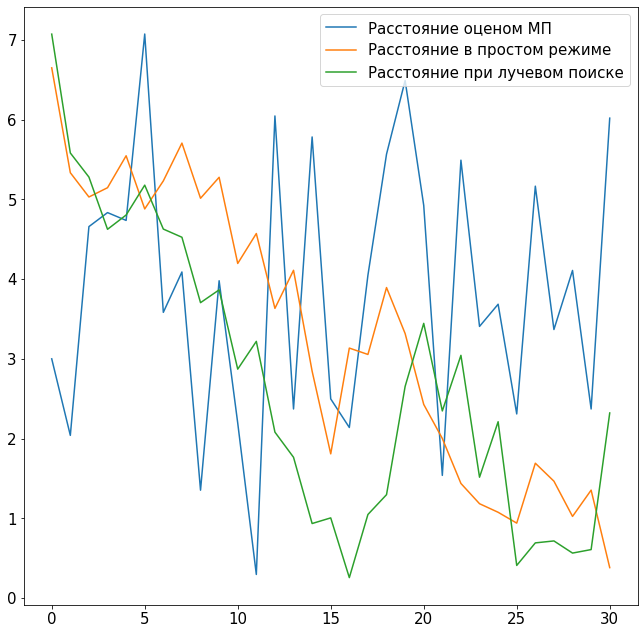

In [23]:
plt.plot([i for i in range(len(base_distances))], max_like_distances, label='Расстояние оценом МП')
plt.plot([i for i in range(len(base_distances))], base_distances, label='Расстояние в простом режиме')
plt.plot([i for i in range(len(base_distances))], markov_beam_search_distances, label='Расстояние при лучевом поиске')
plt.legend()
plt.show()